 1. Import the iris dataset froms cikit-learn. Convert it into an unlabeled dataset by removing the class attribute.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame 
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the dataset 
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


2. Use the Elbow method to identify the best value for k (minimizing WCSS).

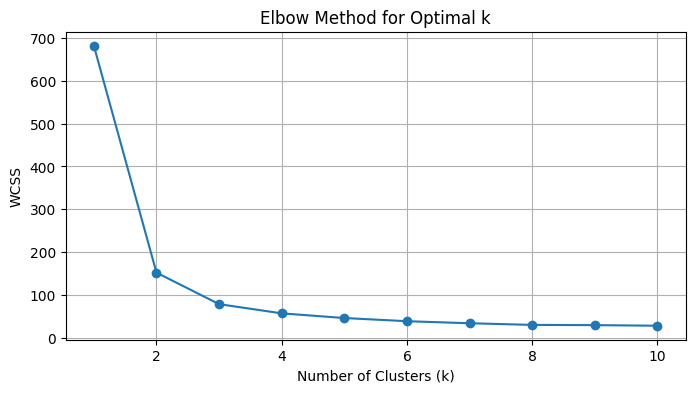

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Using the previously loaded DataFrame `df`
wcss = []
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) 

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


 3. Fit the K-Means algorithm with the k found in part(b).

In [7]:
from sklearn.cluster import KMeans

# Fit K-Means with k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Print assigned clusters
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Cluster  
0          1

4. Explain the output of: kmeans.cluster_centers_ where kmeans is your fitted KMeans object.

In [6]:
kmeans.cluster_centers_

array([[ 6.85384615e+00,  3.07692308e+00,  5.71538462e+00,
         2.05384615e+00, -8.88178420e-16],
       [ 5.00600000e+00,  3.42800000e+00,  1.46200000e+00,
         2.46000000e-01,  1.00000000e+00],
       [ 5.88360656e+00,  2.74098361e+00,  4.38852459e+00,
         1.43442623e+00,  2.00000000e+00]])

5.	Visualize the data points and cluster centers in a 3D plot using the first three features as axes.

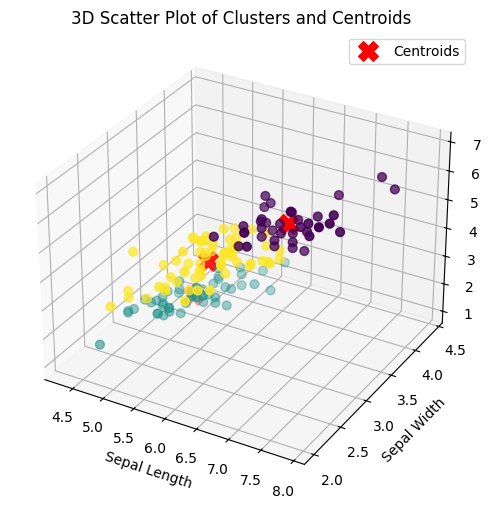

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for the first three features
x = df.iloc[:, 0]  # Feature 1: Sepal Length
y = df.iloc[:, 1]  # Feature 2: Sepal Width
z = df.iloc[:, 2]  # Feature 3: Petal Length
labels = df['Cluster']  # Cluster assignments

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points colored by cluster label
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', marker='o', s=40)

# Plot cluster centers (only first 3 features)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
           c='red', marker='X', s=200, label='Centroids')

# Axis labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Clusters and Centroids')
ax.legend()
plt.show()
